# ASSIGNMENT 2

### QUESTION 13

a) make vector $X$, which is 100 samples from $\mathcal{N}(0,1)$

b) make vector $\epsilon$, which is 100 samples from $\mathcal{N}(0,0.25)$

c) make vector $Y$ as follows: $Y = -1 + 0.5X + \epsilon$

How long is it? 100 entries.

What are $B_0$,$B_1$? -1, 0.5 

d) plot scatterplot of $Y,X$
Comment? It looks like what you would expect


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Set Seed
np.random.seed(1)


X = np.random.normal(0,1,100)
eps = np.random.normal(0,.25,100)

def get_Y(X,eps):
    return -1 + 0.5*X +eps
    
Y = get_Y(X,eps)
sns.scatterplot(y=Y,x=X)


e) Fit linear regresson of Y on X. Compare betas. As seen below, they are close to the values -1 and 0.5

In [143]:
#This is just to make X seen as an array and not numpy list
X=X.reshape(-1,1)
reg = LinearRegression().fit(X, Y)

B1 = reg.coef_[0]
B0 = reg.intercept_

print("B1 = " + str(B1) +" , B0 = "+ str(B0))

B1 = 0.5238567834127928 , B0 = -0.9632466175754496


f) plot the regression line on the scatterplot. 

There's no super easy way to add an abitrary line, like abline. So instead i'll make a dataset, and use regplot with seaborn. This calcultes the LinearModel object and plots it , along with confidence interval. 


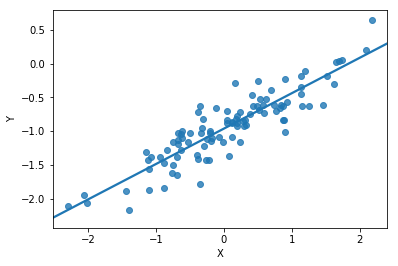

In [144]:

data = np.column_stack((X,Y))
data = pd.DataFrame(data,columns=["X","Y"])
reg_plt = sns.regplot(x="X", y="Y", data=data, ci=None)

g) It makes no difference, I've plotted the reg lines below, they look the same. The coefficent on the square term is effectively zero, it is also printed below

B2 is :0.0038556502345629237


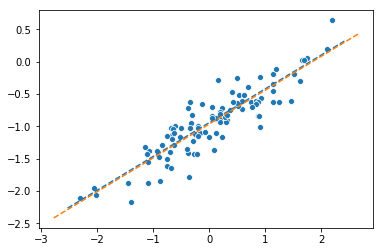

In [148]:
X_sqr = X*X
X_sqr=X_sqr.reshape(-1,1)

data = np.column_stack((X,X_sqr))
reg_sqr = LinearRegression().fit(data, Y)


#Got this from stack exchange
def make_line(slope, slope_2,intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals + slope_2 *x_vals*x_vals
    plt.plot(x_vals, y_vals, '--')
    

sns.scatterplot(y=Y,x=X)
make_line(reg_sqr.coef_[0],reg_sqr.coef_[1],reg_sqr.intercept_)
make_line(reg.coef_[0],0,reg.intercept_)
print("B2 is :"+str(reg_sqr.coef_[1]))


h) Do a) - d) but with less noise, i.e reduce var of eps

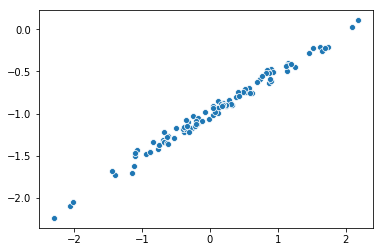

In [149]:

eps=np.random.normal(0,.05,100)
Y_1 = get_Y(X,eps)
sns.scatterplot(y=Y_1,x=X)


i) Do a) - d) but with less noise, i.e increase var of eps

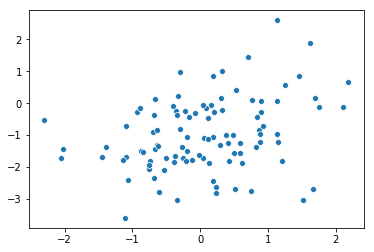

In [150]:

eps=np.random.normal(0,1,100)
Y_2 = get_Y(X,eps)
sns.scatterplot(y=Y_2,x=X)

j) Confidence intervals for B1,B0 for the previous y values. I've been using LinearRegression which is very bare bones, so I'm going to switch to the statsmods package which provides R-like summary data. As you might expect you get somewhat tighter intervals with less noise.  


In [167]:
model = sm.OLS(Y, X).fit()
model.conf_int(alpha=0.05, cols=None)

array([[0.22751246, 0.67193302]])

In [161]:
model = sm.OLS(Y_1, X).fit()
model.conf_int(alpha=0.05, cols=None)

array([[0.19664116, 0.64542234]])

In [162]:
model = sm.OLS(Y_2, X).fit()
model.conf_int(alpha=0.05, cols=None)

array([[-0.0130786 ,  0.64569844]])

### QUESTION 15
Starting off by doing the same cleaning as last assignment

In [181]:
from sklearn import datasets
import seaborn as sns
boston = datasets.load_boston()

#Standard Dataframe object comes with pandas package
X = pd.DataFrame( boston.data)
y = pd.DataFrame(boston.target)
#Note, X is just data with no names at this point so we have to add names. 
X.columns = boston.feature_names
y.columns = ["MedVal"]
data = pd.concat([X,y],axis=1)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedVal
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


A) Run regressions with Y=CRIME and each variable individually 

In [1]:

#g= sns.pairplot(data, x_vars=data.columns[1:], height=10,y_vars="CRIM", kind="reg")

fig, ax = plt.subplots(nrows=3, ncols=5 ,figsize=(30, 20))

#Turn 2-d array to 1d list
ax = ax.ravel()
for i in range(1,14):
    sns.regplot(x=data.columns[i], y="CRIM",ci=95 ,data=data,ax=ax[i-1])

fig.show()

NameError: name 'plt' is not defined

This is a nightmare to look at. Crime is an incredibly messy varible in this dataset. I'm worried that naively approaching ols is going to tell me nothing. A slightly simpler approach, which sees distance as interaction term would make more sense to me. Either that , or making some kind of cluster to deal with other vars.


I start off by just making a list of regression models, indexed by column name. Then I check R-squared and just note the ones that look fairly strong. 

In [252]:

#THIS METHOD IS TERRIBLE
models = {}

for colname in data.drop('CRIM', axis=1).columns:
    models[colname]  = sm.OLS(data['CRIM'],data[colname], data=data).fit()
    

#Load R_sqrs and names onto list
output=[]
for colname in data.drop('CRIM', axis=1).columns:
    output.append((models[colname].rsquared,colname))
    
#Sort by R_sqr 
output.sort()

#Pop off list in order
while output:
    rsqr, name= output.pop()
    print(str(rsqr)+"\t"+name)

0.45129302052107145	RAD
0.31438942057961006	TAX
0.2928305735784239	LSTAT
0.27489766136647886	INDUS
0.2303320074510592	AGE
0.20844809672722087	NOX
0.17167965789561834	PTRATIO
0.13040039466532594	RM
0.08279521200407525	B
0.049752282901307954	MedVal
0.02842802765767516	DIS
0.0027362599493362394	CHAS
1.4731293180969551e-05	ZN


So it looks like RAD,TAX,LSTAT,INDUS, AGE all have the highest R-squared. RAD,TAX are basisically identical and have two cluster so its difficult to tell how well our regression is doing. Likewise, with INDUS. By far, the most interesting ones are LSTAT and AGE. 

B) Run everything in one regression 


Based on the summary below, we have statistical significance (P < 0.05) on DIS, RAD,LSTAT, MEDVAL,ZN,RM

In [289]:
model=  sm.OLS(data['CRIM'], data[data.columns[1:]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     41.89
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           3.37e-71
Time:                        01:05:57   Log-Likelihood:                -1658.6
No. Observations:                 506   AIC:                             3343.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0443      0.019      2.344      0.019       0.007       0.081
INDUS         -0.0740      0.084     -0.881      0.379      -0.239       0.091
CHAS          -0.7988      1.191     -0.671      0.503      -3.139       1.542
NOX           -3.4363      4.385     -0.784      0.434     -12.052       5.180
RM             1.1402      0.531      2.149      0.032       0.098       2.183
AGE           -0.0015      0.018     -0.083      0.934      -0.037       0.034
DIS           -0.7174      0.260     -2.763      0.006      -1.228      -0.207
RAD            0.5227      0.084      6.189      0.000       0.357       0.689
TAX           -0.0019      0.005     -0.377      0.706      -0.012       0.008
PTRATIO        0.0068      0.145      0.047      0.963      -0.279       0.292
B             -0.0049      0.004     -1.359      0.175      -0.012       0.002
LSTAT          0.1940      0.070      2.768      0.006       0.056       0.332
MedVal        -0.1561      0.058     -2.675      0.008      -0.271      -0.041
==============================================================================
Omnibus:                      660.596   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80501.440
Skew:                           6.525   Prob(JB):                         0.00
Kurtosis:                      63.398   Cond. No.                     8.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C) how does B) compare to A)? Well, for variables that are highly correlated like, TAX and RAD, the regression picks the best fitting variable. The other one doesn't contribute any new information so it's coefficent is almost zero.

In [323]:
coef = model.params
coefs = []
count = 0
for colname in data.columns[1:]:
    
    coefs.append((models[colname].params[colname],coef[colname],colname))
    count = count+1


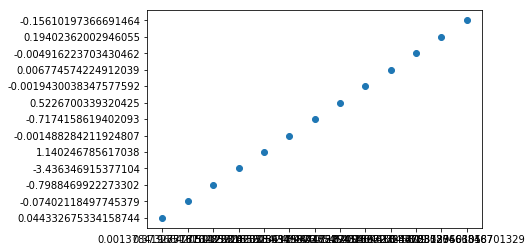

In [343]:
coefs_array = np.asarray(coefs)
coefs_array = coefs_array.transpose()
plt.scatter(coefs_array[0],coefs_array[1])